In [1]:
# An exploration of the Belgian Elections 2019 using the API provided by the Open Knowledge BE Electhaton
# For more information about the API: https://github.com/vriveraq/elections-be-api for local version. 
import pandas as pd
import requests 

# Import results data
election_results = requests.get("https://api.elections.openknowledge.be/format-r/results/2019/CK/C")

# Determine if request was successful
if election_results.status_code == 200:
    print('Success!')
elif election_results.status_code == 404:
    print('Not Found.')

Success!


In [2]:
# See what type of information is contained.
election_results.headers

{'Date': 'Mon, 27 May 2019 23:58:40 GMT', 'Server': 'Apache/2.4.18 (Ubuntu)', 'Cache-Control': 'max-age=300, public', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Access-Control-Allow-Origin': '*', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'application/json'}

In [3]:
data = election_results.json()
print(type(data))
#print(data)

# delete date, time, and count for now 
del data['date']
del data['time']
del data['count']


<class 'dict'>


In [4]:
print(data.keys()) # These keys correspond to the different regions

dict_keys(['2220', '2230', '2229', '2228', '2223', '2222', '2224', '2225', '2221', '2226', '2227'])


In [5]:
# Creates empty dictionary
candidate_dict = {} 
count = 0;
for region_id in data:   
    # Get candidate information     
    for party_id in data[str(region_id)]['results']:
        for key,candidate_id in data[str(region_id)]['results'][str(party_id)]['candidates'].items():                 
            candidate_dict[key] = candidate_id 

In [32]:
candidate_data = {}
count = 0
# Extract relevant data in new dictionary
for key, value in candidate_dict.items():
    candidate_name = candidate_dict[str(key)]['candidate'].get('name');
    # level_val = candidate_dict[str(key)]['candidate'].get('level')
    party_name =  candidate_dict[str(key)]['candidate']['list'].get('name');
    region_name = candidate_dict[str(key)]['candidate']['list']['entity'].get('name_en');  
    num_votes = candidate_dict[str(key)]['votes']; 
    registrants = candidate_dict[str(key)]['candidate']['list']['entity']['registrations']
    candidate_data[count] = {'name': candidate_name, 'party': party_name, 'region': region_name, 'votes': num_votes, 'registrations': registrants}
    count += 1


In [85]:
# Convert to data frame using pandas
candidate_data_df = pd.DataFrame(candidate_data).transpose()
print(len(candidate_data_df))

2437


In [109]:
# Create funcion that groups candidates by column
import numpy as np
import matplotlib.pyplot as plt

def group_data_by(data_frame, column_name, top_num = 10, bar_plot = True, show_votes = True):
    print('Candidates distribution by {}:'.format(column_name))
    
    types = data_frame[column_name].unique() # Here I print the distinct party names
    labels_and_sizes = []

    for group, frame in data_frame.groupby(column_name):
        labels_and_sizes.append([group, len(frame)]) 
    

    
    group_df = pd.DataFrame(labels_and_sizes);
    group_df.columns = [str(column_name),'size']
    top = group_df.sort_values(by ='size', ascending = False).head(top_num)
    if bar_plot == True: 
        y_pos = np.arange(1,2.0*len(top),2)
        plt.barh(y_pos,top['size'],align = 'center', alpha = 0.5)
        plt.yticks(y_pos, top[str(column_name)]) 
        plt.show()   

    return top, votes_per_group

def votes_per_group (data_frame, column_name, top_num = 10):
    
    votes_grouped_df = data_frame.groupby(['votes'])
    #.sum().sort_values(ascending = False).head(top_num)

    return votes_grouped_df

Candidates distribution by party:


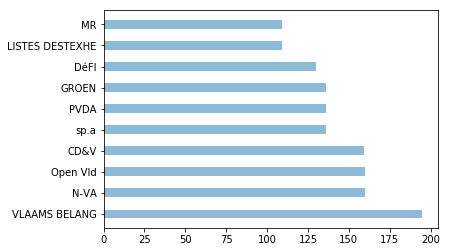

party
AGIR                     4480
B.U.B                    1880
BUB Belgische Unie       3364
CD&V                   999673
CDH                    379725
Collectif Citoyen       19651
D-SA                     7190
DierAnimal              32784
DéFI                   131705
ECOLO                  465949
GROEN                  623125
LA DROITE               10751
LES BELGES D'ABORD       6321
LISTES DESTEXHE         44389
Lutte Ouvrière           3179
MR                     687166
N-VA                  1702263
NATION                   6849
Open Vld               841326
PARTI POPULAIRE         67816
PCB                      1432
PRO                      7723
PS                     857478
PTB                    264847
PTB*PVDA               120182
PV&S                     5108
PVDA                   364016
Piratenpartij            6872
Turquoise                 448
VLAAMS BELANG         1119423
Volt                     1682
WALLONIE INSOUMISE       3223
de coöperatie            1882
sp.a

In [84]:
# group 
test_party = group_data_by(candidate_data_df,'party', show_votes = True, bar_plot = True)
votes_per_group(candidate_data_df,'party')

Candidates distribution by region:


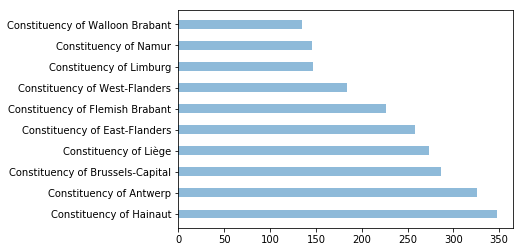

                              region  size
4            Constituency of Hainaut   348
0            Constituency of Antwerp   326
1   Constituency of Brussels-Capital   287
6              Constituency of Liège   273
2      Constituency of East-Flanders   258
3    Constituency of Flemish Brabant   227
10     Constituency of West-Flanders   184
5            Constituency of Limburg   147
8              Constituency of Namur   146
9    Constituency of Walloon Brabant   135


In [60]:
test_region = group_data_by(candidate_data_df,'region',bar_plot = True)
print(test_region)

In [61]:
# We will focus now on the region of Flemish Brabant
flemish_data = candidate_data_df[candidate_data_df['region'] == 'Constituency of Flemish Brabant']
print(flemish_data.info())
print(flemish_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 613 to 839
Data columns (total 5 columns):
name             227 non-null object
party            227 non-null object
region           227 non-null object
registrations    227 non-null object
votes            227 non-null object
dtypes: object(5)
memory usage: 10.6+ KB
None
                       name     party                           region  \
613         DE BLOCK Maggie  Open Vld  Constituency of Flemish Brabant   
614           VANDENPUT Tim  Open Vld  Constituency of Flemish Brabant   
615         LIEKENS Goedele  Open Vld  Constituency of Flemish Brabant   
616  VANWESENBEECK Daniëlle  Open Vld  Constituency of Flemish Brabant   
617          VAN BIESEN Luk  Open Vld  Constituency of Flemish Brabant   

                                         registrations  votes  
613  {'BB': 817707, 'E1_E2': 2368, 'E3_E4': 2247, '...  40819  
614  {'BB': 817707, 'E1_E2': 2368, 'E3_E4': 2247, '...   9620  
615  {'BB': 817707, 'E1_E2

In [110]:
votes_per_group(flemish_data,'name')